In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.collections import LineCollection

In [358]:
phi_poly = 0.30 # packing fraction
phi_part = 0.20

L = 50    # box length
n_part_poly = int(phi_poly*L*L/np.pi)   # number of particles in polymers
n_part = int(phi_part*L*L/np.pi)        # number of free(gel) particles 

tot_n_part = n_part_poly + n_part
print(f"n_part_poly{n_part_poly}")

list_pos_x = np.empty((tot_n_part,))*np.nan        # containers for 
list_pos_y = np.empty((tot_n_part,))*np.nan        # x and y positions of particles

list_nx = np.empty((tot_n_part,))*np.nan        # containers for directors  
list_ny = np.empty((tot_n_part,))*np.nan        # nx and ny 

radius = 1.0                  # radius of particles (currently monodisperse)

avg_length_poly = 5           # random polymer lengths [at least 3 for angles to work]
eq_dis = 2*radius

n_poly = int(n_part_poly/avg_length_poly)
print(f"n_poly={n_poly}")

list_polymers_pos = []        # container for all polymers (particle position), here first index for list becomes ids(labels) for polymer
list_poly_part_id = []        # container for all particles within the polymers, increasing order of particle id corelates with increasing ids of polymers 
list_bonds = []               # container for bonds which stores the positions of pairs in [(x1,y1), (x2,y2)]
list_bond_ids = []            # container to store and label the bonds between pairs
list_angles = []              # container for all angles (each contains particle triplets positions)
list_angles_ids = []          # container for angle ids [corelates with increasing order of polymers and particle ids]
part_ids = []                 # container for particle ids
molecules = []                # contianer for molecule ids 
cnt_poly = 0
cnt_free_part = 0
cnt = 0

while(cnt_poly < n_poly):

    # curr_poly_len = np.random.normal(avg_length_poly, 2)

    new_poly = []         # container for postions of particles in the polymer created in this loop
    new_poly_part_id = [] # container to store the particle ids of polymers

    x,y = np.random.rand(2)*L                  # initialising a single particle randomly inside a box of length L
    overlap = False
    
    for ii in range(0, cnt):
        r_sq = (x - list_pos_x[ii])**2 + (y - list_pos_y[ii])**2
        
        if(r_sq <= 2*radius**2):
            overlap = True
            break

    if overlap:
        continue

    list_pos_x[cnt] = x                        # if passes the checks 
    list_pos_y[cnt] = y                        # particle is assigned inside the box

    theta = np.random.rand()*np.pi
    list_nx[cnt]= np.cos(theta)
    list_ny[cnt]= np.sin(theta)

    new_poly.append([x,y])
    new_poly_part_id.append(cnt)
    molecules.append(cnt_poly)
    part_ids.append(cnt)

    cnt += 1
    curr_dummy_cnt = 1
    
    while(curr_dummy_cnt <= avg_length_poly):

        theta = np.random.rand()*np.pi
        x_new = x + eq_dis*np.cos(theta)
        y_new = y + eq_dis*np.sin(theta)

        overlap = False
    
        for ii in range(0, cnt):
            r_sq = (x_new - list_pos_x[ii])**2 + (y_new - list_pos_y[ii])**2
            
            if(r_sq <= 2*radius**2):
                overlap = True
                break

        if overlap:
           continue

        if(x_new//L != 0 or y_new//L !=0 ):   # check if particle outside box
            while(curr_dummy_cnt > 0):
                list_pos_x[cnt]= np.nan
                list_pos_y[cnt]= np.nan
                list_nx[cnt] = np.nan
                list_ny[cnt] = np.nan
                molecules.pop()
                part_ids.pop()
                cnt-=1
                curr_dummy_cnt -=1
                #cnt_poly=-1
            #list_pos_x[cnt-1]= np.nan
            #list_pos_y[cnt-1]= np.nan
            new_poly = []
            new_poly_part_id = []
            break

        if(curr_dummy_cnt >= 2):
            list_bonds.append([[x,y], [x_new,y_new]])
            list_bond_ids.append([cnt-1,cnt])
            
            n_curr = [x_new-x, y_new -y] # calculating the vector along the bond
            n_curr = n_curr/np.linalg.norm(n_curr) # to get the director for particle 1 -> 2 -> 3 -> (4) last one we need to assign  
            list_nx[cnt-1] = n_curr[0]
            list_ny[cnt-1] = n_curr[1]

            if(curr_dummy_cnt == avg_length_poly):
                list_nx[cnt] = list_nx[cnt-1]
                list_ny[cnt] = list_ny[cnt-1]
                
        if(curr_dummy_cnt >= 3):
            list_angles.append([cnt-2,cnt-1,cnt])
        
        x,y = x_new, y_new
        
        new_poly.append([x_new,y_new])
        
        list_pos_x[cnt] = x                        # if passes the checks 
        list_pos_y[cnt] = y                        # particle is assigned inside the box

        molecules.append(cnt_poly)
        part_ids.append(cnt)

        print(f"cnt = {cnt}") 
        cnt +=1
        curr_dummy_cnt +=1

    print(f"cnt = {cnt}") 
    print(f"cnt_poly = {cnt_poly}")
    list_polymers_pos.append(new_poly)
    list_poly_part_id.append(new_poly_part_id)
    cnt_poly +=1

while(cnt < tot_n_part):

    x,y = np.random.rand(2)*L                  # initialising a single particle randomly inside a box of length L
    overlap = False
    
    for ii in range(0, cnt):
        r_sq = (x - list_pos_x[ii])**2 + (y - list_pos_y[ii])**2

        if(r_sq <= 3*radius**2):
            overlap = True
            break

    if overlap:
        continue

    list_pos_x[cnt] = x                        # if passes the checks 
    list_pos_y[cnt] = y                        # particle is assigned inside the box

    theta_cur = np.random.rand()*2*np.pi
    list_nx[cnt] = np.cos(theta_cur)
    list_ny[cnt] = np.sin(theta_cur)
    
    #print(f"cnt = {cnt}")
    part_ids.append(cnt)
    molecules.append(cnt_poly)
    cnt_poly+=1
    cnt+=1

print(f"cnt = {cnt}")

n_part_poly238
n_poly=47
cnt = 1
cnt = 2


IndexError: pop from empty list

In [341]:
print(np.asarray(list_pos_x))

[19.85374766 18.83185889 20.72045032 22.55790358 23.82476117 22.80716305
 23.05151243 21.05684165 21.81464294 23.81440506 25.00521989 26.67710514
  3.3499563   1.85165736  0.67118753  1.62517638  3.42030752  1.98599343
 19.64267001 20.64366843 21.40177465 20.79655176 21.49047257 21.70960363
 38.98857061 40.15833733 41.62094231 43.17915802 41.27285128 39.41911235
 35.94466377 34.31299358 34.20349817 33.81736569 32.18810828 33.97435702
 43.18222003 44.90904491 46.90114873 47.32750555 49.20794799 47.89915996
 16.48637228 17.24640077 15.27639604 15.33964897 13.3467051  11.88404646
 39.38501387 37.60041198 37.62678494 36.52645933 35.03486837 36.08337087
 46.99943527 45.21500779 43.30566727 44.3010519  45.81598461 43.83413077
  9.69449214 11.10616324 13.10223801 11.70597802  9.80695862  9.87197073
 22.62924473 22.75065729 20.84976372 18.85353417 18.65143176 18.87133202
 19.46657927 17.46736708 17.15412882 15.55157956 13.62189184 15.10903004
 30.82288816 31.69347313 29.71789485 28.69597757 30

In [342]:
print(np.array(list_bond_ids).shape)

(146, 2)


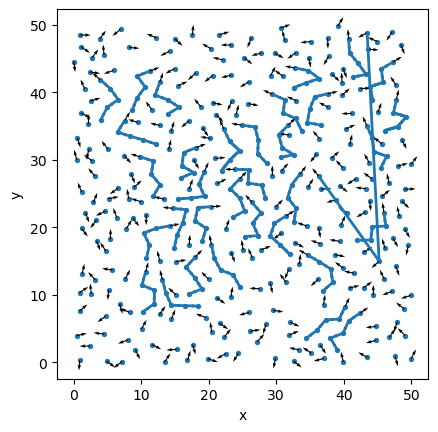

In [350]:
list_pos = np.column_stack((list_pos_x,list_pos_y))

segments = [(list_pos[i], list_pos[j]) for (i, j) in list_bond_ids]
seg_arr = np.array(segments, dtype=float)

fig, ax = plt.subplots()

# Plot bonds
lc = LineCollection(seg_arr, linewidths=2)
ax.add_collection(lc)

# Plot nodes (optional)
ax.scatter(list_pos_x[:], list_pos_y[:], s=8)
plt.quiver(list_pos_x[:], list_pos_y[:],list_nx[:],list_ny[:])

ax.autoscale()
ax.set_aspect("equal", adjustable="box")
ax.set_xlabel("x")
ax.set_ylabel("y")

plt.savefig("mixed_polymer_and_gel.png", dpi = 300, format = "png")
plt.savefig("mixed_polymer_and_gel.svg", dpi = 300, format = "svg")
plt.show()


In [239]:
print(np.asarray(list_angles).shape)

(108, 3)


In [165]:
part_ids = np.asarray(part_ids)
molecules_id = np.asarray(molecules)
types = np.ones(len(list_pos_x))

In [325]:
assert(len(part_ids)== len(molecules_id) )
assert(len(part_ids)== len(types))

AssertionError: 

In [335]:
print(len(part_ids))
print(len(molecules_id))
print(len(types))
print(len(list_pos_x))
print(len(list_nx))

416
437
437
397
397


In [314]:
def write_filaments_input(filename, ids, molecules, types, x, y, nx, ny,):
    # Convert everything to 1D numpy arrays
    cols = [
        np.asarray(ids).ravel(),
        np.asarray(molecules).ravel(),
        np.asarray(types).ravel(),
        np.asarray(x).ravel(),
        np.asarray(y).ravel(),
        np.asarray(nx).ravel(),
        np.asarray(ny).ravel(),]

    n = len(cols[0])
    if any(len(c) != n for c in cols):
        raise ValueError("All columns must have the same length.")

    data = np.column_stack(cols)

    header = "keys: id  molecule type  x  y  nx  ny"

    # Match the style you showed: integers for first 3 cols, floats for the rest
    fmt = ["%d", "%d", "%d", "%.6f", "%.6f", "%.6f", "%.6f"]

    with open(filename, "w", newline="\n") as f:
        f.write(header + "\n")
        np.savetxt(f, data, fmt=fmt, delimiter="  ")  # delimiter is just spacing

# Example usage:
# write_filaments_input("filaments_new.input", ids, molecules, types, x, y, nx, ny)

In [315]:
def write_bonds_input(filename, bond_ids, bond_types, bonds):
    # Convert everything to 1D numpy arrays
    bonds = np.asarray(bonds)
    pair_1 = np.asarray([b[0] for b in bonds])
    pair_2 = np.asarray([b[1] for b in bonds])
    cols = [
        np.asarray(bond_ids).ravel(),
        np.asarray(bond_types).ravel(),
        np.asarray(pair_1).ravel(),
        np.asarray(pair_2).ravel()]

    n = len(cols[0])
    print(n)
    if any(len(c) != n for c in cols):
        raise ValueError("All columns must have the same length.")

    data = np.column_stack(cols)

    #header = "keys: id  molecule type  x  y  nx  ny"

    # Match the style you showed: 4 integers in a row
    fmt = ["%d", "%d", "%d" , "%d"]

    with open(filename, "w", newline="\n") as f:
        #f.write(header + "\n")
        np.savetxt(f, data, fmt=fmt, delimiter="  ")  # delimiter is just spacing

In [331]:
def write_angles_input(filename, angles, angle_types):
    # Convert everything to 1D numpy arrays
    angle_ids = range(0,np.shape(angles)[0])
    angles = np.asarray(angles)
    #part_1 = np.asarray([b[0] for b in angles])
    #part_2 = np.asarray([b[1] for b in angles])
    #part_3 = np.asarray([b[2] for b in angles])
    cols = [
        np.asarray(angle_ids).ravel(),
        np.asarray(angle_types).ravel(),
        np.asarray(angles[:,0]).ravel(),
        np.asarray(angles[:,1]).ravel(),
        np.asarray(angles[:,1]).ravel()]

    n = len(cols[0])
    print(n)
    if any(len(c) != n for c in cols):
        raise ValueError("All columns must have the same length.")

    data = np.column_stack(cols)

    #header = "keys: id  molecule type  x  y  nx  ny"

    # Match the style you showed: 5 integers in a row
    fmt = ["%d", "%d", "%d" , "%d", "%d"]

    with open(filename, "w", newline="\n") as f:
        #f.write(header + "\n")
        np.savetxt(f, data, fmt=fmt, delimiter="  ")  # delimiter is just spacing

In [332]:
write_filaments_input("filament.input", part_ids, molecules_id, types, list_pos_x, list_pos_y, list_nx, list_ny)

ValueError: All columns must have the same length.

In [333]:
bond_ids = range(np.shape(list_bond_ids)[0])
bond_types = np.ones(np.shape(list_bond_ids)[0])
write_bonds_input("filabent.bonds", bond_ids, bond_types, list_bond_ids)


144


In [334]:
angle_types = np.ones(np.shape(list_angles)[0])
write_angles_input("filament.angles", list_angles, angle_types)

103


In [328]:
np.isnan(list_nx) 

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,